Contexte : 

<center> Mission

In [1]:
#! pip install pep8
#! pip install autopep8
#! pip install folium --upgrade

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/*.py

/content/drive/MyDrive/functions.py


In [4]:
#!cat '/content/drive/MyDrive/functions.py'

In [5]:
import sys
sys.path.append('/content/drive/MyDrive')

**Import des bibliothèques**

In [6]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import folium
from scipy import stats
from folium.plugins import (FastMarkerCluster, Fullscreen, MiniMap,
                            HeatMap, HeatMapWithTime, LocateControl)
%matplotlib inline

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from functions import *

In [8]:
customers = pd.read_csv('https://raw.githubusercontent.com/bachir151/Projet-openclassrooms/master/P4/data/olist_customers_dataset.csv')
geolocation = pd.read_csv('https://raw.githubusercontent.com/bachir151/Projet-openclassrooms/master/P4/data/olist_geolocation_dataset.csv')
order_items = pd.read_csv('https://raw.githubusercontent.com/bachir151/Projet-openclassrooms/master/P4/data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('https://raw.githubusercontent.com/bachir151/Projet-openclassrooms/master/P4/data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('https://raw.githubusercontent.com/bachir151/Projet-openclassrooms/master/P4/data/olist_order_reviews_dataset.csv')
orders = pd.read_csv('https://raw.githubusercontent.com/bachir151/Projet-openclassrooms/master/P4/data/olist_orders_dataset.csv')
products = pd.read_csv('https://raw.githubusercontent.com/bachir151/Projet-openclassrooms/master/P4/data/olist_products_dataset.csv')
sellers = pd.read_csv('https://raw.githubusercontent.com/bachir151/Projet-openclassrooms/master/P4/data/olist_sellers_dataset.csv')
product_category = pd.read_csv('https://raw.githubusercontent.com/bachir151/Projet-openclassrooms/master/P4/data/product_category_name_translation.csv')

**Affichage de la taille de chaque table**

In [9]:
print('table Customers : ',customers.shape,'\n')
print('Table Geolocation : ', geolocation.shape, '\n')
print('Table order_items : ', order_items.shape,'\n')
print('Table order_payments : ', order_payments.shape,'\n')
print('Table order_reviews : ', order_reviews.shape,'\n')
print('Table orders : ', orders.shape,'\n')
print('Table products : ', products.shape,'\n')
print('Table Sellers : ', sellers.shape,'\n')
print('Table product_category : ', product_category.shape[0],'\n')

table Customers :  (99441, 5) 

Table Geolocation :  (1000163, 5) 

Table order_items :  (112650, 7) 

Table order_payments :  (103886, 5) 

Table order_reviews :  (99224, 7) 

Table orders :  (99441, 8) 

Table products :  (32951, 9) 

Table Sellers :  (3095, 4) 

Table product_category :  71 



Schéma de la base de données qui nous permet de voir les liaisons qui existent entre nos différentes tables de données.

Nous allons voir le détail de chaque table

**La table Customer**

In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
customers.groupby('customer_unique_id')[['customer_id']]\
    .count().sort_values(by='customer_id', ascending=False).nlargest(5,'customer_id') # On garde que les 5 premières lignes

,customer_id
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7


Nous allons visualiser la répartition des clients dans le villes.

In [12]:
print("Nombre de valeur (sans doublons) de chaque colonne \n")
customers.nunique()

Nombre de valeur (sans doublons) de chaque colonne 



customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Les 10 des villes ayant le plus de clients 

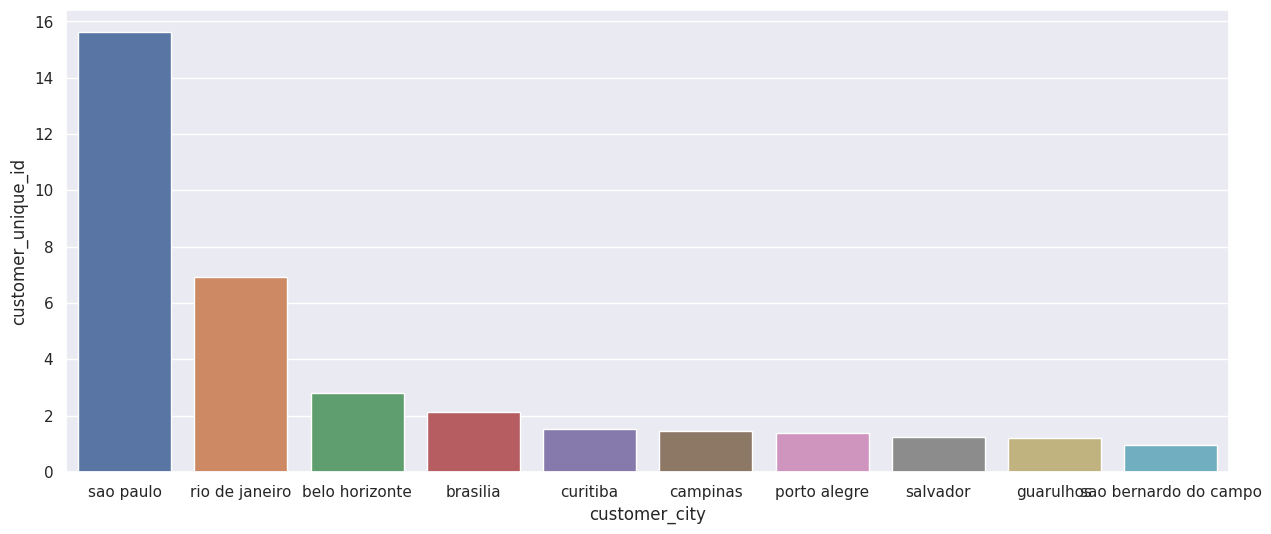

In [13]:
#Nombre de client par ville
df=pd.DataFrame(customers.groupby('customer_city')['customer_unique_id']
                        .count().reset_index())
#Pourcentage de client par ville 
df['customer_unique_id']= df['customer_unique_id']/( len(customers['customer_unique_id']))*100

#Top 5 des villes qui contiennent plus de clients 
df = df.nlargest(10,'customer_unique_id')

#Tracé Barplot
plt.figure(figsize=(15, 6))
p=sns.barplot(x='customer_city', y="customer_unique_id", data=df )
#show_values(p)

Les 10 des états ayant le plus de clients 

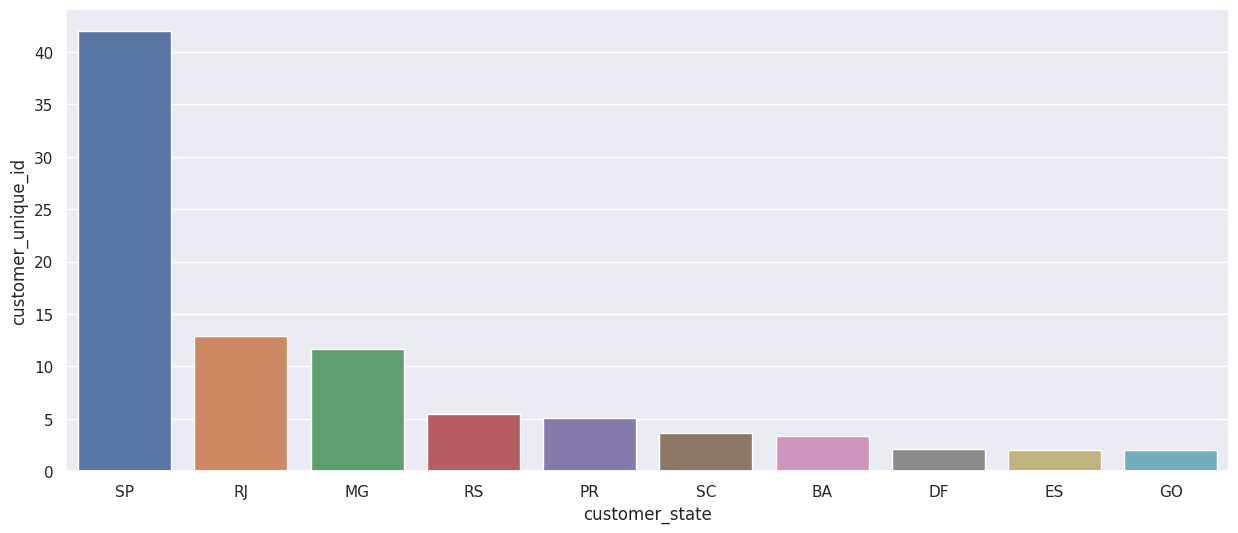

In [14]:
#Nombre de client par etat
df=pd.DataFrame(customers.groupby('customer_state')['customer_unique_id']
                        .count().reset_index())
#Pourcentage de client par etat
df['customer_unique_id']= df['customer_unique_id']/( len(customers['customer_unique_id']))*100

#Top 5 des villes qui contiennent plus de clients 
df = df.nlargest(10,'customer_unique_id')

#Tracé Barplot
plt.figure(figsize=(15, 6))
p=sns.barplot(x='customer_state', y="customer_unique_id", data=df )
#show_values(p)

Les 10 des codes postaux où il y a plus de clients

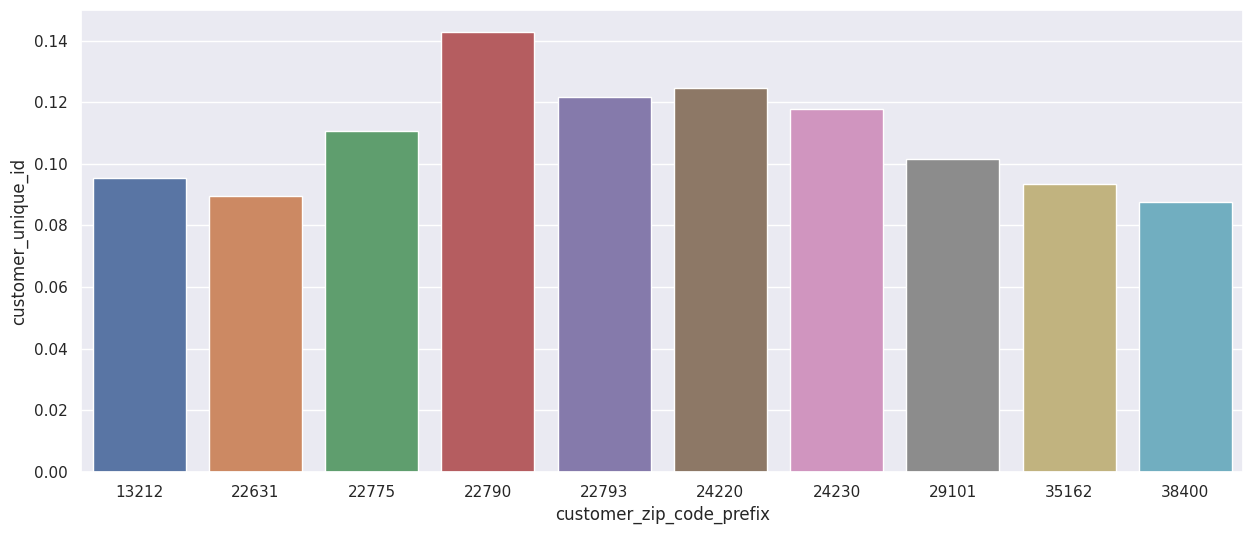

In [15]:
#Nombre de client par etat
df=pd.DataFrame(customers.groupby('customer_zip_code_prefix')['customer_unique_id']
                        .count().reset_index())
#Pourcentage de client par etat
df['customer_unique_id']= df['customer_unique_id']/( len(customers['customer_unique_id']))*100

#Top 5 des villes qui contiennent plus de clients 
df = df.nlargest(10,'customer_unique_id')

#Tracé Barplot
plt.figure(figsize=(15, 6))
p=sns.barplot(x='customer_zip_code_prefix', y="customer_unique_id", data=df )
#show_values(p)

<ins>**La table Products**

Il existe deux tables pour les produits : la table product et la table product_category.

In [16]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [17]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


On va fusionner la **product_category** à la table **product** pour compléter la table **product**. C'est notre première jointure. Toutes les autres jointures vont être faites plus tard.

In [107]:
len(set(product_category))

2

In [18]:
products = products.merge(product_category,
                          on='product_category_name',
                          how='left'
                          )

In [19]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Valeurs manquantes de la table products

In [20]:
products.isnull().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

Les 10 des produits les plus présents dans la base de données

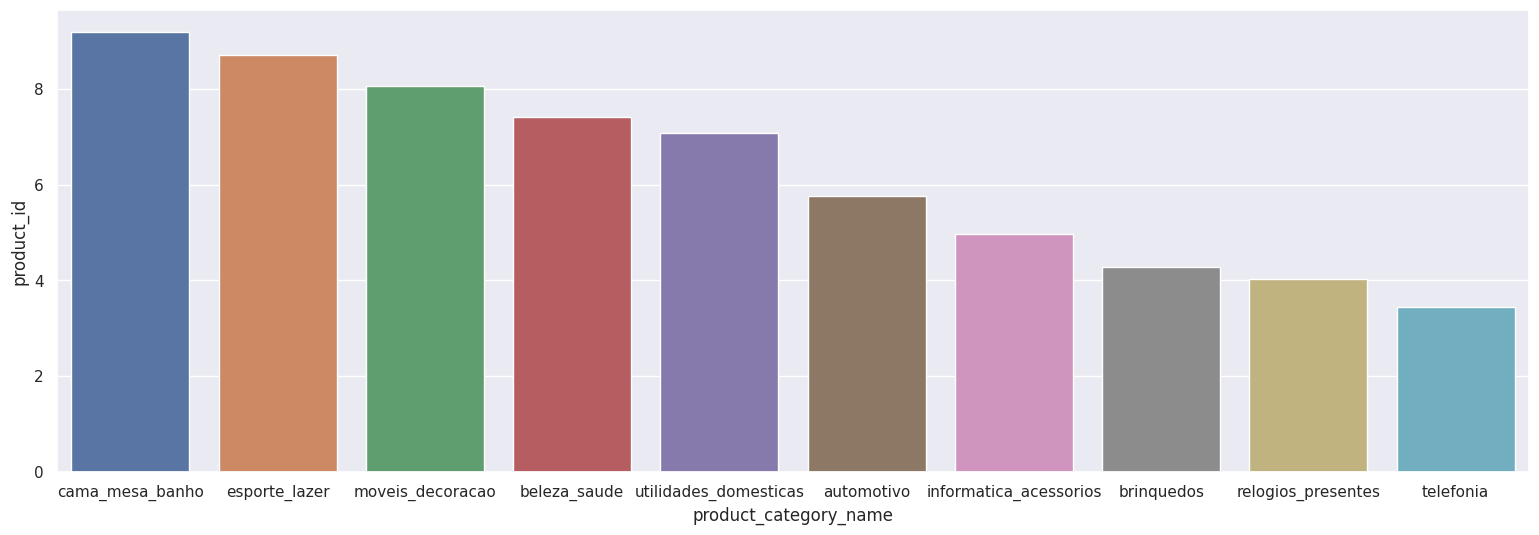

In [21]:
#Nombre de produits par client
df=pd.DataFrame(products.groupby('product_category_name')['product_id']
                        .count().reset_index())
#Pourcentage de client par etat
df['product_id']= df['product_id']/( len(products['product_id']))*100

#Top 5 des villes qui contiennent plus de clients 
df = df.nlargest(10,'product_id')

#Tracé Barplot
plt.figure(figsize=(19, 6))
p=sns.barplot(x='product_category_name', y="product_id", data=df )
#show_values(p)

<ins> **La table Sellers**

C'est la table des vendeurs

In [22]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Répartition des vendeurs selon les villes 

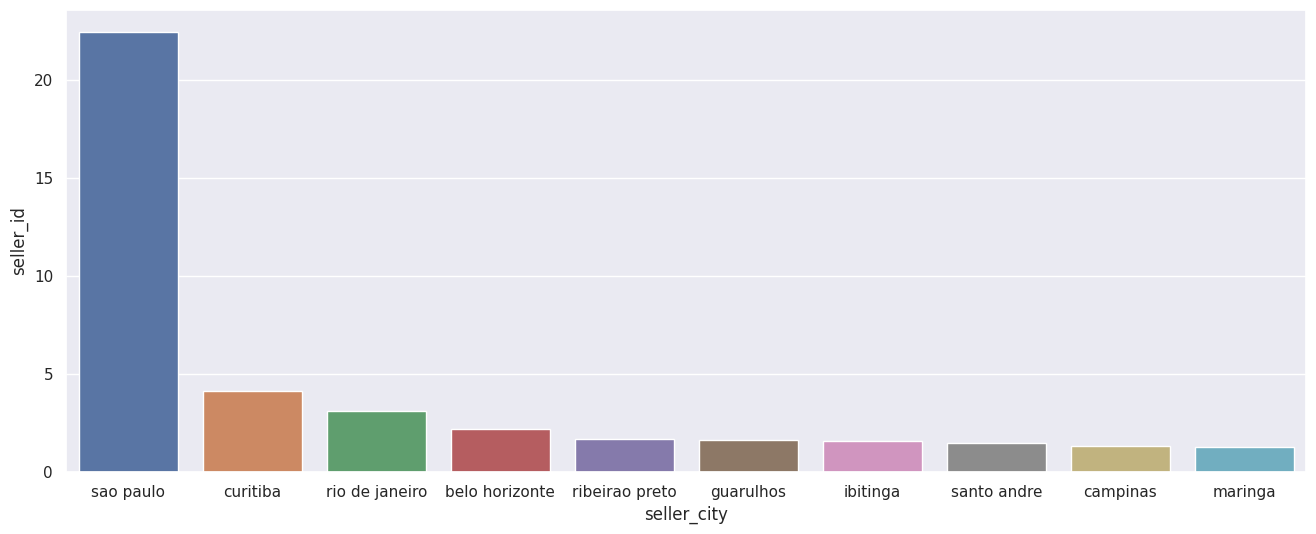

In [23]:
#Nombre de produits par client
df=pd.DataFrame(sellers.groupby('seller_city')['seller_id']
                        .count().reset_index())
#Pourcentage de client par etat
df['seller_id']= df['seller_id']/( len(sellers['seller_id']))*100

#Top 5 des villes qui contiennent plus de clients 
df = df.nlargest(10,'seller_id')

#Tracé Barplot
plt.figure(figsize=(16, 6))
p=sns.barplot(x='seller_city', y="seller_id", data=df )
#show_values(p)

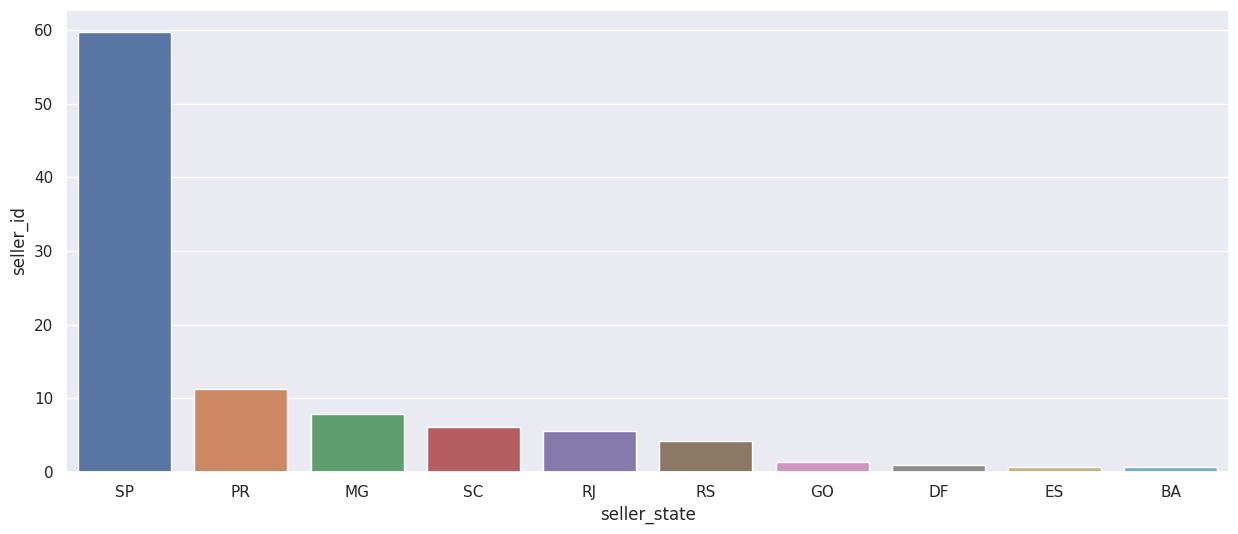

In [24]:
#Nombre de produits par client
df=pd.DataFrame(sellers.groupby('seller_state')['seller_id']
                        .count().reset_index())
#Pourcentage de client par etat
df['seller_id']= df['seller_id']/( len(sellers['seller_id']))*100

#Top 5 des villes qui contiennent plus de clients 
df = df.nlargest(10,'seller_id')

#Tracé Barplot
plt.figure(figsize=(15, 6))
p=sns.barplot(x='seller_state', y="seller_id", data=df )
#show_values(p)

In [25]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

<ins>**La table Geolocation**

Nous allons faire représentation spatiale des données de cette table.

In [26]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [27]:
geolocation [geolocation['geolocation_zip_code_prefix']==1001	]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
99,1001,-23.549292,-46.633559,sao paulo,SP
206,1001,-23.550498,-46.634338,sao paulo,SP
235,1001,-23.550642,-46.634410,sao paulo,SP
299,1001,-23.549698,-46.633909,sao paulo,SP
326,1001,-23.551427,-46.634074,sao paulo,SP
429,1001,-23.550498,-46.634338,sao paulo,SP
519,1001,-23.551337,-46.634027,sao paulo,SP
575,1001,-23.549779,-46.633957,são paulo,SP
583,1001,-23.551337,-46.634027,sao paulo,SP
596,1001,-23.550498,-46.634338,sao paulo,SP


Avec Folium, nous allons représenter ces données géographiques sur un fond de cartes.

In [28]:
coordinate=geolocation.groupby('geolocation_zip_code_prefix')[
    ['geolocation_lat', 'geolocation_lng']].agg(lambda x:x.value_counts().index[0]).reset_index()
    
#On change les noms de colonne 
coordinate.columns = ['customer_zip_code_prefix', 'latitude', 'longitude']

On fusionne les deux tables pour obtenir la localisation des clients.

In [29]:
cust_loc = customers.merge(coordinate,
                               on='customer_zip_code_prefix',
                               how='inner')

In [30]:
cust_loc.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
latitude                    0
longitude                   0
dtype: int64

Génération de la carte 

In [31]:
# Aggregation des longitudes et latitude 
latitude = cust_loc['latitude'].to_list()
longitude = cust_loc['longitude'].to_list()
position = list(zip(latitude, longitude))

# Création de la carte folium
carte = folium.Map(location=[-14, -49], zoom_start=3.8)

# Utilisation de FastMarkerCluster
FastMarkerCluster(data=position).add_to(carte)

carte

Output hidden; open in https://colab.research.google.com to view.

<ins>**Localisation des sellers**

In [32]:
coordinate1=geolocation.groupby('geolocation_zip_code_prefix')[
    ['geolocation_lat', 'geolocation_lng']].agg(lambda x:x.value_counts().index[0]).reset_index()
    
#On change les noms de colonne 
coordinate1.columns = ['seller_zip_code_prefix', 'latitude', 'longitude']

sellers_loc = sellers.merge(coordinate1,
                               on='seller_zip_code_prefix',
                               how='inner')

# Aggregation des longitudes et latitude 
latitude = sellers_loc['latitude'].to_list()
longitude = sellers_loc['longitude'].to_list()
position = list(zip(latitude, longitude))

# Création de la carte folium
carte = folium.Map(location=[-14, -49], zoom_start=3.8)

# Utilisation de FastMarkerCluster
FastMarkerCluster(data=position).add_to(carte)

carte

**La table Orders**

In [33]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [34]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Cette table contient une colonne date. Nous allons convertir cette colonne en datetime.

In [35]:
order_items['shipping_limit_date'] = pd.to_datetime(
    order_items['shipping_limit_date'])

In [36]:
#Verifier si il y a des doublons dans la colonne order_id
len(set(order_items["order_id"])) == len(order_items["order_id"]) # Résultat = False si doublon il y a

False

In [37]:
#Verifier si il y a des doublons dans la colonne product_id
len(set(order_items["product_id"])) == len(order_items["product_id"])  # Résultat = False si doublon il y a

False

Une commande peut être associé à plusieurs produits. Un produit peut être associé à plusieurs commandes.

<ins>**La table order_payments**

In [38]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [39]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [40]:
#Différents mode de de payment
set(order_payments['payment_type'])

{'boleto', 'credit_card', 'debit_card', 'not_defined', 'voucher'}

Il y a différents type de paiement 

In [41]:
order_payments['payment_type'] = order_payments['payment_type'].replace(
    ['boleto', 'voucher'], ['billet', 'bon achat'])

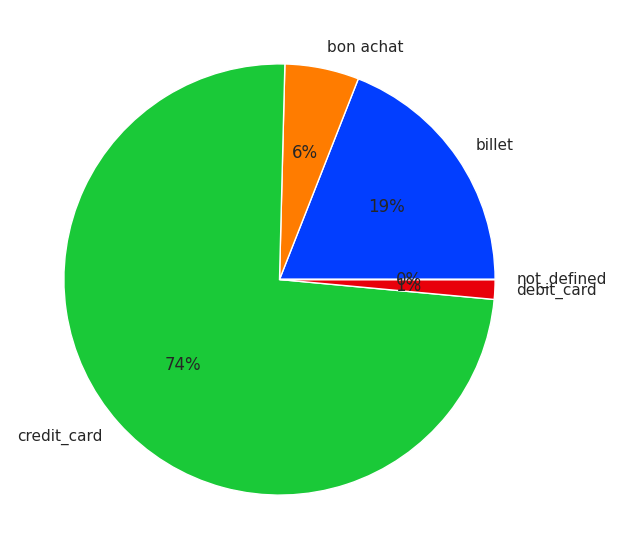

In [42]:
#Nombre de produits par client
df=pd.DataFrame(order_payments.groupby('payment_type')['order_id']
                        .count().reset_index())
palette_color = sns.color_palette('bright')

plt.figure(figsize=(9, 7))
# plotting data on chart
plt.pie(df['order_id'], labels=df['payment_type'], colors=palette_color, autopct='%.0f%%')
plt.show()

Il y a peu de payments dont le type est inconnue on va les supprimer

In [43]:
order_payments[order_payments['payment_type'] == 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [44]:
order_payments=order_payments[order_payments['payment_type'] != 'not_defined']

<ins>**La table order_reviews**

In [45]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [46]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [47]:
#Conversion des colonnes dates
order_reviews['review_creation_date'] = pd.to_datetime(
    order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(
    order_reviews['review_answer_timestamp'])

In [48]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [49]:
#Verifier si il y a des doublons dans la colonne order_id
len(set(order_reviews["review_id"])) == len(order_reviews["review_id"]) # Résultat = False si doublon il y a

False

Visualisons la répartition des notes

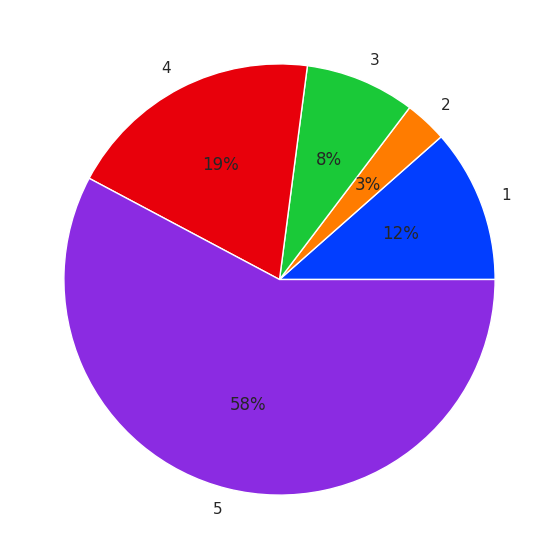

In [50]:
#Répartition des notes 
df=pd.DataFrame(order_reviews.groupby('review_score')['review_id']
                        .count().reset_index())
palette_color = sns.color_palette('bright')

plt.figure(figsize=(9, 7))
# plotting data on chart
plt.pie(df['review_id'], labels=df['review_score'], colors=palette_color, autopct='%.0f%%')
plt.show()

<ins> **La table orders**

In [51]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [52]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [53]:
#Conversion des colonnes dates
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])

orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])

orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

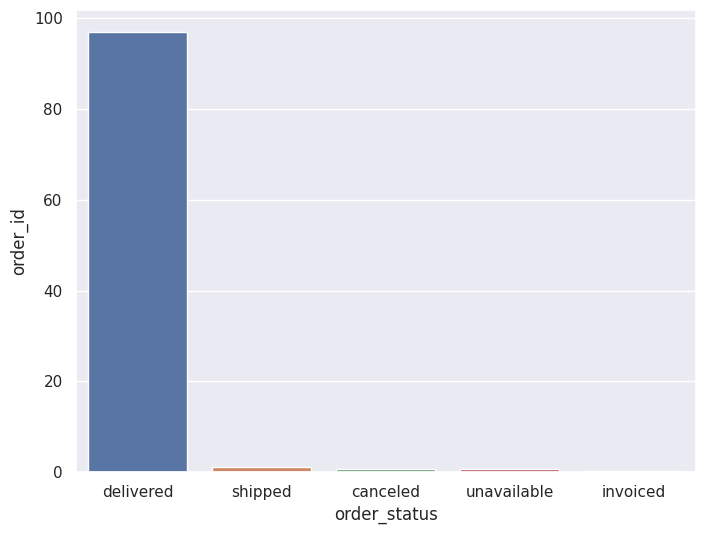

In [54]:
##Répartition des status de commande
df=pd.DataFrame(orders.groupby('order_status')['order_id']
                        .count().reset_index())
#Pourcentage de client par etat
df['order_id']= df['order_id']/( len(orders['order_id']))*100

#Top 5 des villes qui contiennent plus de clients 
df = df.nlargest(5,'order_id')

#Tracé Barplot
plt.figure(figsize=(8, 6))
p=sns.barplot(x='order_status', y="order_id", data=df )
#show_values(p)

La majorité des commandes ont été livrées.

In [55]:
orders = orders[orders['order_status'] == 'delivered']

In [56]:
order_copy=orders.copy()
order_copy['order_purchase_timestamp'] = pd.to_datetime(order_copy["order_purchase_timestamp"].dt.strftime('%Y-%m'))
order_copy.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-01,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-01,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-01,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-01,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-01,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [57]:
order_copy['order_year'] = order_copy["order_purchase_timestamp"].dt.year  # Extraction des années
order_copy['order_month'] = order_copy["order_purchase_timestamp"].apply(lambda x: x.strftime('%B')) #Extraction des mois 
order_copy['order_day'] = order_copy["order_purchase_timestamp"].apply(lambda x: x.strftime("%A")) #Extraction des jours

In [58]:
"""order_copy['order_day'] = order_copy["order_purchase_timestamp"].dt.dayofweek # Extraction des jours de la semaine

# Créer un dictionnaire pour mapper les numéros de jour aux noms de jour
jours = {0: 'Lundi', 1: 'Mardi', 2: 'Mercredi', 3: 'Jeudi', 4: 'Vendredi', 5: 'Samedi', 6: 'Dimanche'}
# Appliquer la fonction de mapping à la colonne "Jour_Num" pour créer la nouvelle colonne "Nom_Jour"
order_copy['order_day_name'] = order_copy['order_day'].map(jours)"""

'order_copy[\'order_day\'] = order_copy["order_purchase_timestamp"].dt.dayofweek # Extraction des jours de la semaine\n\n# Créer un dictionnaire pour mapper les numéros de jour aux noms de jour\njours = {0: \'Lundi\', 1: \'Mardi\', 2: \'Mercredi\', 3: \'Jeudi\', 4: \'Vendredi\', 5: \'Samedi\', 6: \'Dimanche\'}\n# Appliquer la fonction de mapping à la colonne "Jour_Num" pour créer la nouvelle colonne "Nom_Jour"\norder_copy[\'order_day_name\'] = order_copy[\'order_day\'].map(jours)'

In [59]:
order_copy = order_copy.set_index('order_purchase_timestamp')
df= pd.DataFrame(order_copy.groupby('order_purchase_timestamp')['customer_id'].agg('count'))

In [60]:
df.head()

,customer_id
order_purchase_timestamp,
2016-09-01,1
2016-10-01,265
2016-12-01,1
2017-01-01,750
2017-02-01,1653


Fréquence des achats par mois et par heure. A faire.

Evolution des achats en 2017 et en 2018.

In [61]:
order_copy

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_year,order_month,order_day
order_purchase_timestamp,,,,,,,,,,
2017-10-01,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,October,Sunday
2018-07-01,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,July,Sunday
2018-08-01,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,August,Wednesday
2017-11-01,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,November,Wednesday
2018-02-01,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,February,Thursday
...,...,...,...,...,...,...,...,...,...,...
2017-03-01,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017,March,Wednesday
2018-02-01,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018,February,Thursday
2017-08-01,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017,August,Tuesday


In [62]:
df

,customer_id
order_purchase_timestamp,
2016-09-01,1
2016-10-01,265
2016-12-01,1
2017-01-01,750
2017-02-01,1653
2017-03-01,2546
2017-04-01,2303
2017-05-01,3546
2017-06-01,3135


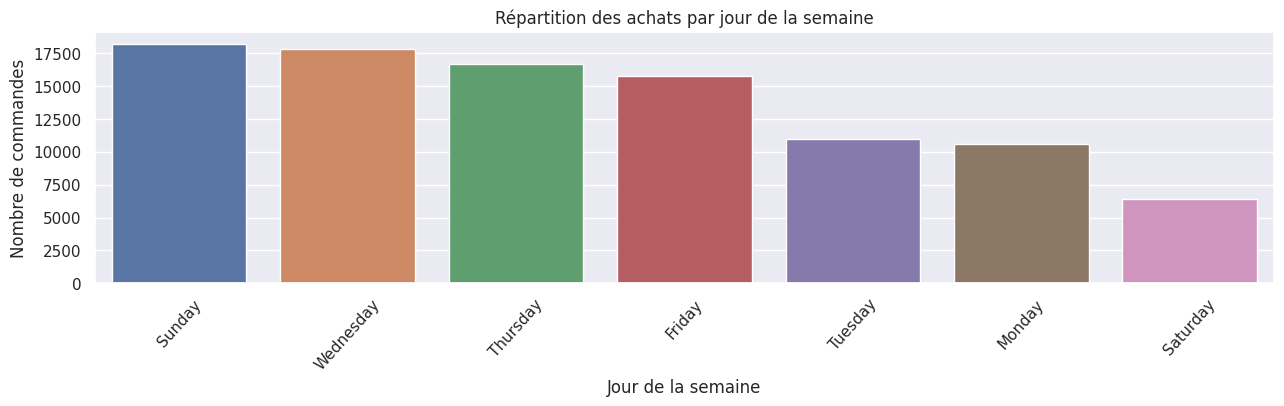

In [63]:
plt.figure(figsize=(13,4))
#order = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]
order = set (order_copy['order_day'])
order = sorted(order, key=lambda x: order_copy[order_copy['order_day'] == x].shape[0], reverse=True)
sns.countplot(x="order_day", data=order_copy, order=order)
# Tracer la distribution des catégories
#plt.xticks(rotation=45)
sns.set(style="darkgrid")
plt.xticks(rotation=48)
plt.tight_layout()  # Ajouter cette ligne
plt.title('Répartition des achats par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de commandes')

plt.show()

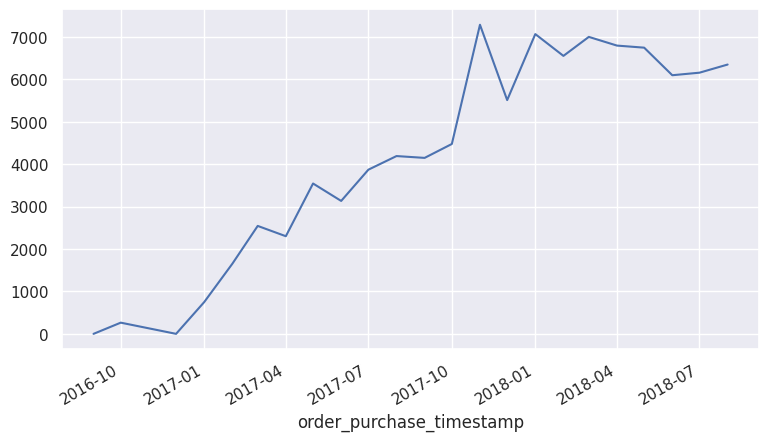

In [64]:
plt.figure(figsize=(9, 5))
df['customer_id'].plot()
plt.show()

In [65]:
order_copy.head()

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_year,order_month,order_day
order_purchase_timestamp,,,,,,,,,,
2017-10-01,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,October,Sunday
2018-07-01,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,July,Sunday
2018-08-01,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,August,Wednesday
2017-11-01,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,November,Wednesday
2018-02-01,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,February,Thursday


In [66]:
!pip install sorted-months-weekdays
!pip install sort-dataframeby-monthorweek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3248 sha256=c9950a498957aaccc8227818e92f782fa3c8634dc7ac0d623a7bcc0542b35f86
  Stored in directory: /root/.cache/pip/wheels/2a/70/02/2addaa9d5ffdc61dcd436a3c6eed123aea9053591367bcf584
Successfully built sorted-months-weekdays
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3440 sha256=0090eb3591b4ddb893de954d08c8ccf373dbf6fddc5b0317a6f66925c315dd98
  Stored in directory: /root/.cache/pip/wheels/94/66/fa/f621d4b2c9c3eeb09cbd33697f4bb60bfe9d3d900d3a59329d
Successfully built sort-dataframeby-monthorweek


In [67]:
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

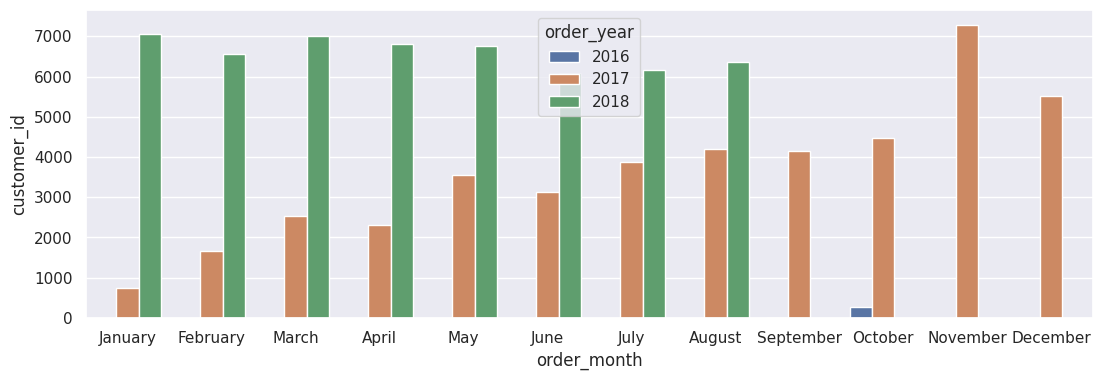

In [68]:
plt.figure(figsize=(13,4))
tmp1 = pd.DataFrame(order_copy.groupby(['order_month','order_year'])[['customer_id']].agg('count').reset_index())
# On tri par ordre mensuel
tmp1 = Sort_Dataframeby_Month(df=tmp1,monthcolumnname='order_month')
#Taracé du graphique
sns.barplot(data=tmp1, x="order_month", y="customer_id", hue="order_year")
plt.show()

On peut d'après ce graphique comparer les achats effectués en 2016 et 2017.

Nous allons une grande table regroupant les clients et leurs informations sur chacun de leur achat.

In [69]:
custumers_position = customers.merge(coordinate,
                               on='customer_zip_code_prefix',
                               how='inner')

In [70]:
customer_purchase_info = custumers_position.merge(orders, on='customer_id', how='inner')
customer_purchase_info  = customer_purchase_info.merge(order_items, on='order_id', how='inner')
customer_purchase_info  = customer_purchase_info.merge(order_reviews, on='order_id', how='inner')
customer_purchase_info  = customer_purchase_info.merge(order_payments, on='order_id', how='inner')
customer_purchase_info  = customer_purchase_info.merge(products, on='product_id', how='inner')

Dans cette table on peut trouver l'identifiant de chaque client, sa location ainsi que toutes les infos relatives à ses achats.

In [71]:
customer_purchase_info.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,latitude,longitude,order_id,order_status,order_purchase_timestamp,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.513713,-47.396644,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,146.87,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,340.50,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
2,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,340.50,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
3,44e25679aa4d5d2ef5103f6b0174a586,613259d64ba972e49dc25b019b7918c3,6414,barueri,SP,-23.495901,-46.874687,03afb3c10af52ddfa3c33b9881bf43f8,delivered,2017-12-07 16:41:50,...,131.50,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
4,ac318397fb90e64c9a724a3fc61ef587,aaad33c5051196b5e73c7d65b9072e1d,37137,alfenas,MG,-21.407572,-45.943353,3c75044db750a89606612ed286713eb8,delivered,2018-03-13 20:11:20,...,100.00,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture


Observons les valeurs manquantes

In [72]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [73]:
customer_purchase_info.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
latitude                              0
longitude                             0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date          2
order_delivered_customer_date         8
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
review_id                             0
review_score                          0
review_comment_title             101017
review_comment_message            66588
review_creation_date                  0


In [74]:
customer_purchase_info.shape

(114557, 39)

In [75]:
#temporary_table = customer_purchase_info.copy()

Le **RFM** est une technique d'analyse de la segmentation de la clientèle qui permet de classer les clients en fonction de leur comportement d'achat. Le nom RFM est un acronyme pour les trois critères utilisés dans cette analyse : Récence (R), Fréquence (F) et Montant (M).

- Récence (R) : mesure la date de la dernière transaction du client. Les clients qui ont effectué un achat plus récemment sont considérés comme plus précieux pour l'entreprise.

- Fréquence (F) : mesure le nombre de transactions effectuées par le client sur une période de temps donnée. Les clients qui effectuent plus d'achats sont considérés comme plus précieux pour l'entreprise.

- Montant (M) : mesure le montant total dépensé par le client sur une période de temps donnée. Les clients qui dépensent plus sont considérés comme plus précieux pour l'entreprise.

En combinant ces trois critères, on peut créer une matrice RFM qui classe les clients en fonction de leur valeur pour l'entreprise. Les clients qui ont des scores élevés en R, F et M sont considérés comme les plus précieux, tandis que les clients qui ont des scores plus faibles sont considérés comme moins précieux. Cette analyse peut aider les entreprises à mieux comprendre les comportements d'achat de leurs clients et à prendre des décisions stratégiques en matière de marketing et de gestion de la relation client.

Nous allons nous baser sur le RFM pour créer trois tables associées à chacune des mesures.

<ins> **La table Récence**

In [76]:
recency = customer_purchase_info [['customer_unique_id', 'order_purchase_timestamp']].groupby('customer_unique_id').max().reset_index()


recency['recency'] = (
    (recency['order_purchase_timestamp'].max() -
     recency['order_purchase_timestamp']).dt.days)

recency = recency[["customer_unique_id","recency"]]
recency

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114
2,0000f46a3911fa3c0805444483337064,536
3,0000f6ccb0745a6a4b88665a16c9f078,320
4,0004aac84e0df4da2b147fca70cf8255,287
...,...,...
92496,fffcf5a5ff07b0908bd4e2dbc735a684,446
92497,fffea47cd6d3cc0a88bd621562a9d061,261
92498,ffff371b4d645b6ecea244b27531430a,567
92499,ffff5962728ec6157033ef9805bacc48,118


<ins> **La table fréquence**

In [77]:
# Create a dataframe to store customers id and frequency scores
frequency = customer_purchase_info[['customer_unique_id', 'order_id']].groupby('customer_unique_id').count().reset_index()
frequency.rename(columns={"order_id":"frequency"}, inplace=True)
frequency

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
92496,fffcf5a5ff07b0908bd4e2dbc735a684,2
92497,fffea47cd6d3cc0a88bd621562a9d061,1
92498,ffff371b4d645b6ecea244b27531430a,1
92499,ffff5962728ec6157033ef9805bacc48,1


<ins> **La table montant** 

In [78]:
montant = customer_purchase_info[['customer_unique_id', 'payment_value']].groupby('customer_unique_id').sum().reset_index()

montant.rename(columns={"payment_value":"monetary"}, inplace=True)
montant 

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
92496,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84
92497,fffea47cd6d3cc0a88bd621562a9d061,84.58
92498,ffff371b4d645b6ecea244b27531430a,112.46
92499,ffff5962728ec6157033ef9805bacc48,133.69


Une fois que l'on a obtenu les 3 indicateurs essentiels du RFM, nous allons recupérer d'autres indicateurs à partir des données comme le Review, frais de livraison, etc. Une fois tous indicateurs obtenus, nous allons créer une grande table regroupant toutes ces indicateurs.

In [79]:
segment_rfm = recency.merge(frequency, on='customer_unique_id', how='inner')
segment_rfm = segment_rfm.merge(montant, on='customer_unique_id', how='inner')
segment_rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89
...,...,...,...,...
92496,fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84
92497,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58
92498,ffff371b4d645b6ecea244b27531430a,567,1,112.46
92499,ffff5962728ec6157033ef9805bacc48,118,1,133.69


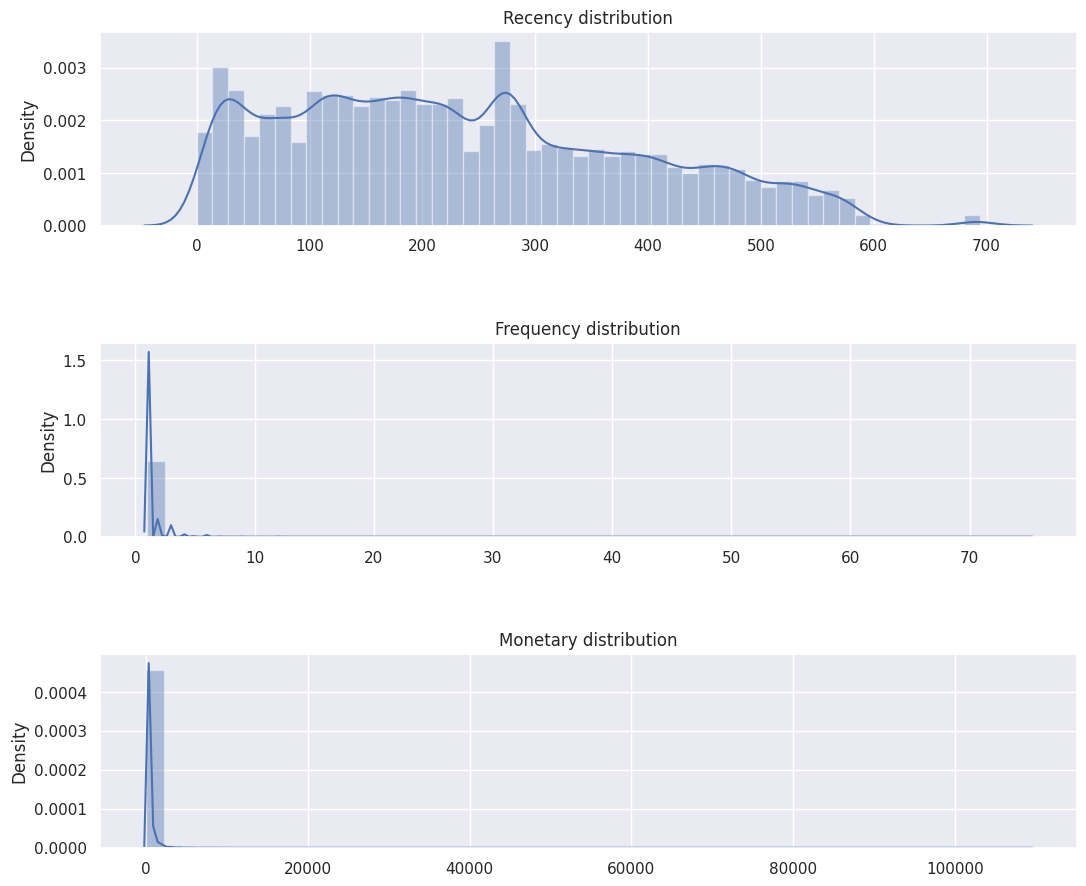

In [80]:
import warnings
warnings.simplefilter("ignore")

plt.figure(figsize=(12, 10))

#Recency
plt.subplot(3, 1, 1)
sns.distplot(segment_rfm['recency'])
plt.title('Recency distribution')
plt.xlabel(None)

#Frequency
plt.subplot(3, 1, 2)
sns.distplot(segment_rfm['frequency'])
plt.title('Frequency distribution')
plt.xlabel(None)

#Monetary
plt.subplot(3, 1, 3)
sns.distplot(segment_rfm['monetary'])
plt.title('Monetary distribution')
plt.xlabel(None)

plt.tight_layout(pad = 4)
plt.show()

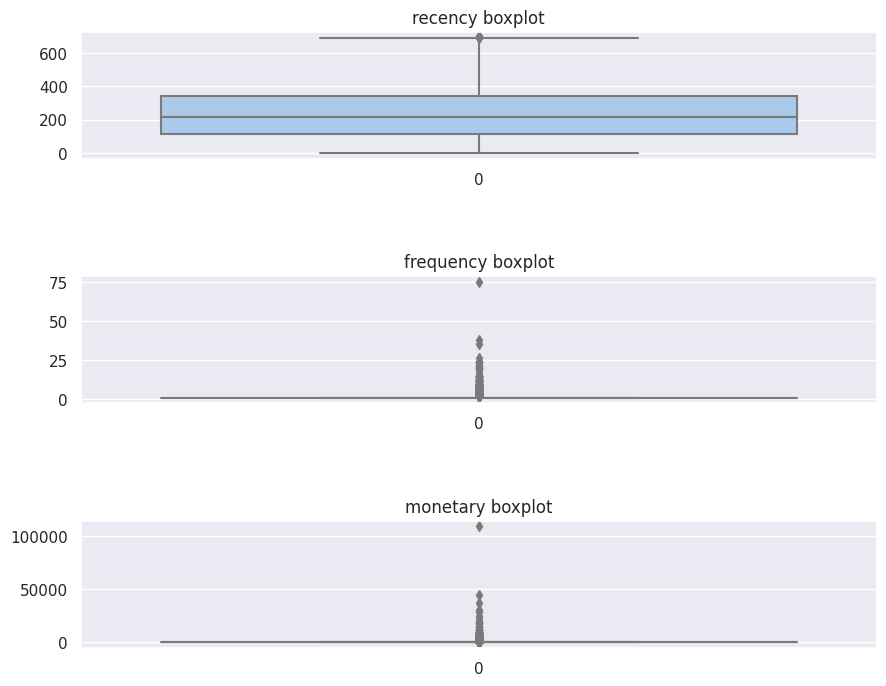

In [81]:
#Columns to examine
features = ['recency', 'frequency', 'monetary']

#Creating a boxplot for outlier detection
n = 1

plt.figure(figsize = (10, 8))

for feature in features:
    plt.subplot(3,1,n)
    sns.boxplot(segment_rfm[feature], palette = 'pastel').set(xlabel = None)
    plt.title(f'{feature} boxplot')
    n = n + 1
    
plt.tight_layout(pad = 4)

<ins> **commentaire**

In [82]:
note_com = customer_purchase_info[['customer_unique_id', 'review_score']].groupby('customer_unique_id').mean().reset_index()
note_com.rename(columns={"review_score":"note_com"}, inplace=True)
note_com #Table 1 : a ajouter dans la table finale

,customer_unique_id,note_com
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
2,0000f46a3911fa3c0805444483337064,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0
4,0004aac84e0df4da2b147fca70cf8255,5.0
...,...,...
92496,fffcf5a5ff07b0908bd4e2dbc735a684,5.0
92497,fffea47cd6d3cc0a88bd621562a9d061,4.0
92498,ffff371b4d645b6ecea244b27531430a,5.0
92499,ffff5962728ec6157033ef9805bacc48,5.0


<ins> **Frais de livraison**

In [83]:
frais_livraison = customer_purchase_info[['customer_unique_id', 'freight_value']].groupby('customer_unique_id').mean().reset_index()
frais_livraison.rename(columns={"freight_value":"frais_livraison"}, inplace=True)
frais_livraison #Table 2 : a ajouter dans la table finale

,customer_unique_id,frais_livraison
0,0000366f3b9a7992bf8c76cfdf3221e2,12.00
1,0000b849f77a49e4a4ce2b2a4ca5be3f,8.29
2,0000f46a3911fa3c0805444483337064,17.22
3,0000f6ccb0745a6a4b88665a16c9f078,17.63
4,0004aac84e0df4da2b147fca70cf8255,16.89
...,...,...
92496,fffcf5a5ff07b0908bd4e2dbc735a684,248.71
92497,fffea47cd6d3cc0a88bd621562a9d061,19.69
92498,ffff371b4d645b6ecea244b27531430a,22.56
92499,ffff5962728ec6157033ef9805bacc48,18.69


<ins> **Durée moyen de livraison**

In [84]:
t_moyen_livraison =  customer_purchase_info[['customer_unique_id', 'order_purchase_timestamp', 'order_delivered_customer_date']].groupby('customer_unique_id').mean().reset_index()
t_moyen_livraison['temps_moyen_livraison'] = (t_moyen_livraison['order_delivered_customer_date'] -t_moyen_livraison['order_purchase_timestamp']).dt.days

t_moyen_livraison =  t_moyen_livraison [['customer_unique_id','temps_moyen_livraison']]
t_moyen_livraison  #Table 3 : a ajouter dans la table finale

,customer_unique_id,temps_moyen_livraison
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0
2,0000f46a3911fa3c0805444483337064,25.0
3,0000f6ccb0745a6a4b88665a16c9f078,20.0
4,0004aac84e0df4da2b147fca70cf8255,13.0
...,...,...
92496,fffcf5a5ff07b0908bd4e2dbc735a684,27.0
92497,fffea47cd6d3cc0a88bd621562a9d061,30.0
92498,ffff371b4d645b6ecea244b27531430a,14.0
92499,ffff5962728ec6157033ef9805bacc48,11.0


In [85]:
t_moyen_livraison.isnull().sum() # Faut penser à supprimer les valeurs manquantes 

customer_unique_id       0
temps_moyen_livraison    8
dtype: int64

<ins> **Localisation**

In [86]:
#Distance qui sépare le client et le vendeur 
#Chaque commande loc customer ID et loc seller 
#Retard de livraison  ( temps estimé et le temps réel pour avoir si retard de livrasion il y a )
#Variable : Catégorie de produit à regrouper (les mettre dans des unités plus larges , exp : informatique , sport)

# Prochaine étape  : mise en place du modèle de clustering 
# K-means  :  k- elbow vizualiser : pour détermenier le nombre optimal de k à conserver; Distortion : à quel moment on repère une cooude; silouhette ; 
#distance de  Kalanski Var (inter)/Var(Intra) --> +oo; caractériser les clusters (radarplot, parallèle plot).
# CAH 
# DBscan : à voir 

## Attention au nombre d'individus dans un cluster 


Regardons de près les catégories de produits 

In [87]:
customer_purchase_info.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,latitude,longitude,order_id,order_status,order_purchase_timestamp,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.513713,-47.396644,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,146.87,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,340.50,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
2,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,340.50,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
3,44e25679aa4d5d2ef5103f6b0174a586,613259d64ba972e49dc25b019b7918c3,6414,barueri,SP,-23.495901,-46.874687,03afb3c10af52ddfa3c33b9881bf43f8,delivered,2017-12-07 16:41:50,...,131.50,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
4,ac318397fb90e64c9a724a3fc61ef587,aaad33c5051196b5e73c7d65b9072e1d,37137,alfenas,MG,-21.407572,-45.943353,3c75044db750a89606612ed286713eb8,delivered,2018-03-13 20:11:20,...,100.00,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture


In [88]:
 pd.DataFrame(customer_purchase_info["product_category_name_english"].value_counts())

,product_category_name_english
bed_bath_table,11658
health_beauty,9719
sports_leisure,8720
furniture_decor,8540
computers_accessories,7902
...,...
arts_and_craftmanship,24
la_cuisine,15
cds_dvds_musicals,14
fashion_childrens_clothes,7


Il existe 71 catégories de produits. Nous allons les regrouper en catégorie plus grandes 

**Maison et Jardin**: bed_bath_table, furniture_decor, housewares, garden_tools, home_construction, furniture_living_room, furniture_bedroom, furniture_mattress_and_upholstery, kitchen_dining_laundry_garden_furniture, home_comfort_2, flowers, la_cuisine.

**Électronique** : computers_accessories, telephony, electronics, tablets_printing_image, small_appliances_home_oven_and_coffee, audio, fixed_telephony.

**Mode** : watches_gifts, fashion_bags_accessories, fashion_shoes, fashio_female_clothing, fashion_male_clothing, fashion_underwear_beach, fashion_sport, fashion_childrens_clothes.

**Santé et Beauté**: health_beauty, perfumery, baby, diapers_and_hygiene.
Sports et Loisirs : sports_leisure, toys, cool_stuff, musical_instruments, party_supplies, cds_dvds_musicals.

**Auto et Moto** : auto.

**Livres et Médias** : books_general_interest, books_technical, books_imported.
Alimentation et Boissons : food, drinks, food_drink.

**Autres** : luggage_accessories, market_place, industry_commerce_and_business, agro_industry_and_commerce, office_furniture, consoles_games, construction_tools_construction, construction_tools_lights, air_conditioning, signaling_and_security, construction_tools_safety, christmas_supplies, small_appliances, cine_photo, dvds_blu_ray, art, security_and_services.




In [89]:
# Créer un dictionnaire avec les catégories de produits correspondantes
categories = {
    "Maison et Jardin": ["bed_bath_table", "furniture_decor", "housewares", "garden_tools", "home_construction", "furniture_living_room", "furniture_bedroom", "furniture_mattress_and_upholstery", "kitchen_dining_laundry_garden_furniture", "home_comfort_2", "flowers", "la_cuisine"],
    "Électronique": ["computers_accessories", "telephony", "electronics", "tablets_printing_image", "small_appliances_home_oven_and_coffee", "audio", "fixed_telephony"],
    "Mode": ["watches_gifts", "fashion_bags_accessories", "fashion_shoes", "fashio_female_clothing", "fashion_male_clothing", "fashion_underwear_beach", "fashion_sport", "fashion_childrens_clothes"],
    "Santé et Beauté": ["health_beauty", "perfumery", "baby", "diapers_and_hygiene"],
    "Sports et Loisirs": ["sports_leisure", "toys", "cool_stuff", "musical_instruments", "party_supplies", "cds_dvds_musicals"],
    "Auto et Moto": ["auto"],
    "Livres et Médias": ["books_general_interest", "books_technical", "books_imported"],
    "Alimentation et Boissons": ["food", "drinks", "food_drink"],
    "Autres": ["luggage_accessories", "market_place", "industry_commerce_and_business", "agro_industry_and_commerce", "office_furniture", "consoles_games", "construction_tools_construction", "construction_tools_lights", "air_conditioning", "signaling_and_security", "construction_tools_safety", "christmas_supplies", "small_appliances", "cine_photo", "dvds_blu_ray", "art", "security_and_services"]
}

#customer_purchase_info["catégorie"]  = customer_purchase_info["product_category_name_english"].apply(lambda x: [k for k, v in categories.items() if x in v][0] if any(x in v for v in categories.values()) else "Autres")

# Créer un dictionnaire inversé pour avoir les noms de catégories en clé et les valeurs en liste
categories_inverses = {}
for categorie, noms in categories.items():
    for nom in noms:
        categories_inverses[nom] = categorie

# Ajouter une nouvelle colonne "catégorie" en utilisant la fonction map() et le dictionnaire inversé
customer_purchase_info["catégorie"] = customer_purchase_info["product_category_name_english"].map(categories_inverses)

customer_purchase_info


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,latitude,longitude,order_id,order_status,order_purchase_timestamp,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,catégorie
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.513713,-47.396644,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,Autres
1,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,Autres
2,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,Autres
3,44e25679aa4d5d2ef5103f6b0174a586,613259d64ba972e49dc25b019b7918c3,6414,barueri,SP,-23.495901,-46.874687,03afb3c10af52ddfa3c33b9881bf43f8,delivered,2017-12-07 16:41:50,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,Autres
4,ac318397fb90e64c9a724a3fc61ef587,aaad33c5051196b5e73c7d65b9072e1d,37137,alfenas,MG,-21.407572,-45.943353,3c75044db750a89606612ed286713eb8,delivered,2018-03-13 20:11:20,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,Autres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114552,d1b1ef27bb2fbdeedc8823febfcc4072,20120882a566b99eb67c104dc05d896f,9336,maua,SP,-23.659848,-46.410127,435361f134c9396bdb0de6ed227fd883,delivered,2017-07-09 15:17:43,...,cama_mesa_banho,50.0,332.0,2.0,1400.0,37.0,23.0,35.0,bed_bath_table,Maison et Jardin
114553,7dcd626576af9555424051dbdb01cb5a,7c0b4f7719caf8b29a4c8dbd5a1446c9,77370,natividade,TO,-11.709159,-47.725555,9a142fefa71ded6bdc21817299f5ab7c,delivered,2018-06-11 16:10:21,...,esporte_lazer,26.0,2174.0,3.0,4236.0,68.0,20.0,23.0,sports_leisure,Sports et Loisirs
114554,ec5f9c9dd3ff056f05411979267887a5,640ac18151727c99757e30b92253dbc0,5315,sao paulo,SP,-23.532950,-46.731394,f50852b20857fd7ff56126315745e45a,delivered,2018-04-29 17:40:51,...,casa_construcao,41.0,215.0,6.0,150.0,16.0,7.0,12.0,home_construction,Maison et Jardin
114555,7fb62e47282b83f023cf1fef8d8309c9,48f2f72862e37acc97f50b4484ee2af4,4319,sao paulo,SP,-23.647471,-46.636862,c456339d894d329ad45d39e3d6796b90,delivered,2017-10-17 21:50:00,...,ferramentas_jardim,34.0,288.0,1.0,600.0,16.0,31.0,18.0,garden_tools,Maison et Jardin


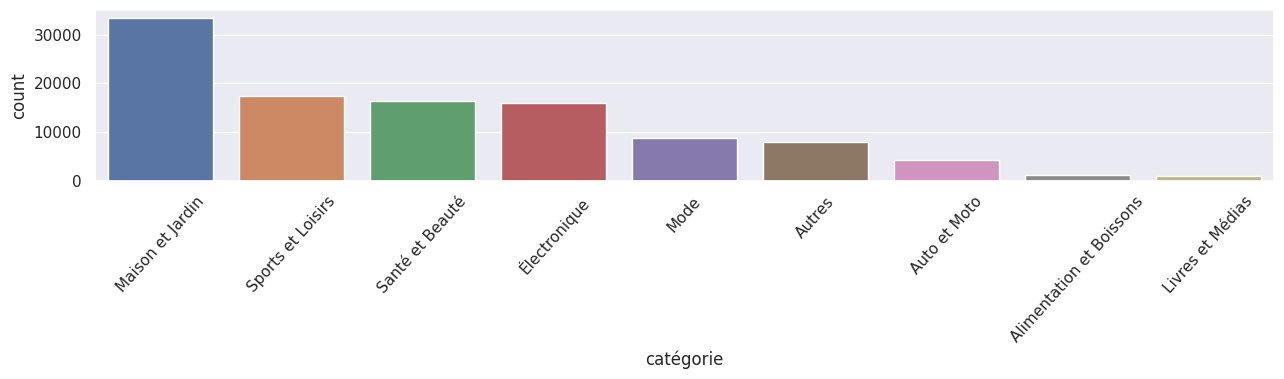

In [90]:
# Utiliser seaborn pour tracer la distribution des catégories
plt.figure(figsize=(13,4))
sns.countplot(x="catégorie", data=customer_purchase_info,order=customer_purchase_info['catégorie'].value_counts().sort_values(ascending=False).index)
# Tracer la distribution des catégories
#plt.xticks(rotation=45)
sns.set(style="darkgrid")
plt.xticks(rotation=48)
plt.tight_layout()  # Ajouter cette ligne

plt.show()

Les produits de la catégorie "Maison et jardin", "sport et Loisirs", "santé et Beauté" sont les  plus achetés.

In [91]:
# Utiliser la méthode get_dummies pour transformer la colonne catégories en variables binaires
categorie_encoded= pd.get_dummies(customer_purchase_info["catégorie"])

# Concaténer les variables binaires avec le tableau de données original
customer_purchase_info_encd = pd.concat([customer_purchase_info, categorie_encoded], axis=1)


In [92]:
customer_purchase_info_encd

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,latitude,longitude,order_id,order_status,order_purchase_timestamp,...,catégorie,Alimentation et Boissons,Auto et Moto,Autres,Livres et Médias,Maison et Jardin,Mode,Santé et Beauté,Sports et Loisirs,Électronique
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.513713,-47.396644,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,Autres,0,0,1,0,0,0,0,0,0
1,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,Autres,0,0,1,0,0,0,0,0,0
2,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,Autres,0,0,1,0,0,0,0,0,0
3,44e25679aa4d5d2ef5103f6b0174a586,613259d64ba972e49dc25b019b7918c3,6414,barueri,SP,-23.495901,-46.874687,03afb3c10af52ddfa3c33b9881bf43f8,delivered,2017-12-07 16:41:50,...,Autres,0,0,1,0,0,0,0,0,0
4,ac318397fb90e64c9a724a3fc61ef587,aaad33c5051196b5e73c7d65b9072e1d,37137,alfenas,MG,-21.407572,-45.943353,3c75044db750a89606612ed286713eb8,delivered,2018-03-13 20:11:20,...,Autres,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114552,d1b1ef27bb2fbdeedc8823febfcc4072,20120882a566b99eb67c104dc05d896f,9336,maua,SP,-23.659848,-46.410127,435361f134c9396bdb0de6ed227fd883,delivered,2017-07-09 15:17:43,...,Maison et Jardin,0,0,0,0,1,0,0,0,0
114553,7dcd626576af9555424051dbdb01cb5a,7c0b4f7719caf8b29a4c8dbd5a1446c9,77370,natividade,TO,-11.709159,-47.725555,9a142fefa71ded6bdc21817299f5ab7c,delivered,2018-06-11 16:10:21,...,Sports et Loisirs,0,0,0,0,0,0,0,1,0
114554,ec5f9c9dd3ff056f05411979267887a5,640ac18151727c99757e30b92253dbc0,5315,sao paulo,SP,-23.532950,-46.731394,f50852b20857fd7ff56126315745e45a,delivered,2018-04-29 17:40:51,...,Maison et Jardin,0,0,0,0,1,0,0,0,0
114555,7fb62e47282b83f023cf1fef8d8309c9,48f2f72862e37acc97f50b4484ee2af4,4319,sao paulo,SP,-23.647471,-46.636862,c456339d894d329ad45d39e3d6796b90,delivered,2017-10-17 21:50:00,...,Maison et Jardin,0,0,0,0,1,0,0,0,0


**Catégorie des produit**

In [93]:
cat = categorie_encoded.columns
cat

Index(['Alimentation et Boissons', 'Auto et Moto', 'Autres',
       'Livres et Médias', 'Maison et Jardin', 'Mode', 'Santé et Beauté',
       'Sports et Loisirs', 'Électronique'],
      dtype='object')

In [94]:
categorie_produit =  customer_purchase_info_encd[['Alimentation et Boissons', 'Auto et Moto', 'Autres',
                                    'Livres et Médias', 'Maison et Jardin', 'Mode', 'Santé et Beauté',
                                    'Sports et Loisirs', 'Électronique','customer_unique_id']].groupby('customer_unique_id')\
                                    .sum()\
                                    .reset_index()
categorie_produit  #Table 5 : a ajouter dans la table finale

,customer_unique_id,Alimentation et Boissons,Auto et Moto,Autres,Livres et Médias,Maison et Jardin,Mode,Santé et Beauté,Sports et Loisirs,Électronique
0,0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,1,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,1,0,0
2,0000f46a3911fa3c0805444483337064,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,0,0,0,0,1
4,0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
92496,fffcf5a5ff07b0908bd4e2dbc735a684,0,0,0,0,0,0,2,0,0
92497,fffea47cd6d3cc0a88bd621562a9d061,0,0,0,0,0,0,1,0,0
92498,ffff371b4d645b6ecea244b27531430a,0,1,0,0,0,0,0,0,0
92499,ffff5962728ec6157033ef9805bacc48,0,0,0,0,0,1,0,0,0


In [95]:
categorie_produit['Alimentation et Boissons'].value_counts()

0     91571
1       799
2        90
4        17
3        14
5         5
6         2
8         2
10        1
Name: Alimentation et Boissons, dtype: int64

Création du jeu de données final

In [96]:
data_model = segment_rfm.merge(note_com, on='customer_unique_id', how='inner')  # Ajout de la note donnée par le client
data_model = data_model.merge(frais_livraison, on='customer_unique_id', how='inner')
data_model = data_model.merge(t_moyen_livraison, on='customer_unique_id', how='inner')
data_model = data_model.merge(categorie_produit, on='customer_unique_id', how='inner')

data_model

,customer_unique_id,recency,frequency,monetary,note_com,frais_livraison,temps_moyen_livraison,Alimentation et Boissons,Auto et Moto,Autres,Livres et Médias,Maison et Jardin,Mode,Santé et Beauté,Sports et Loisirs,Électronique
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0,12.00,6.0,0,0,0,0,1,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,8.29,3.0,0,0,0,0,0,0,1,0,0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,3.0,17.22,25.0,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4.0,17.63,20.0,0,0,0,0,0,0,0,0,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,5.0,16.89,13.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92496,fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84,5.0,248.71,27.0,0,0,0,0,0,0,2,0,0
92497,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,4.0,19.69,30.0,0,0,0,0,0,0,1,0,0
92498,ffff371b4d645b6ecea244b27531430a,567,1,112.46,5.0,22.56,14.0,0,1,0,0,0,0,0,0,0
92499,ffff5962728ec6157033ef9805bacc48,118,1,133.69,5.0,18.69,11.0,0,0,0,0,0,1,0,0,0


In [97]:
data_model.isnull().sum()

customer_unique_id          0
recency                     0
frequency                   0
monetary                    0
note_com                    0
frais_livraison             0
temps_moyen_livraison       8
Alimentation et Boissons    0
Auto et Moto                0
Autres                      0
Livres et Médias            0
Maison et Jardin            0
Mode                        0
Santé et Beauté             0
Sports et Loisirs           0
Électronique                0
dtype: int64

In [98]:
data_model.shape

(92501, 16)

In [99]:
data_model[data_model["temps_moyen_livraison"].isnull()]

,customer_unique_id,recency,frequency,monetary,note_com,frais_livraison,temps_moyen_livraison,Alimentation et Boissons,Auto et Moto,Autres,Livres et Médias,Maison et Jardin,Mode,Santé et Beauté,Sports et Loisirs,Électronique
7019,13467e882eb3a701826435ee4424f2bd,273,1,134.83,5.0,17.53,NaN,0,1,0,0,0,0,0,0,0
8516,175378436e2978be55b8f4316bce4811,62,1,54.97,5.0,9.07,NaN,0,0,0,1,0,0,0,0,0
10132,1bd06a0c0df8b23dacfd3725d2dc0bb9,58,1,158.07,5.0,19.07,NaN,0,0,0,0,0,1,0,0,0
17095,2f17c5b324ad603491521b279a9ff4de,70,1,354.24,5.0,25.24,NaN,0,0,1,0,0,0,0,0,0
21667,3bc508d482a402715be4d5cf4020cc81,58,1,158.07,5.0,19.07,NaN,0,0,0,0,0,1,0,0,0
74122,cce5e8188bf42ffb3bb5b18ff58f5965,82,1,120.12,1.0,9.13,NaN,0,0,0,0,0,0,0,0,1
77971,d77cf4be2654aa70ef150f8bfec076a6,460,1,194.00,5.0,15.00,NaN,0,0,0,0,0,0,0,1,0
85362,ebf7e0d43a78c81991a4c59c145c75db,58,1,204.62,5.0,15.63,NaN,0,0,0,0,0,0,0,1,0


In [100]:
#Les 8 donnnées manquantes sont à supprimer ou pas ? 

In [101]:
data_model = data_model.dropna()

In [102]:
data_model

,customer_unique_id,recency,frequency,monetary,note_com,frais_livraison,temps_moyen_livraison,Alimentation et Boissons,Auto et Moto,Autres,Livres et Médias,Maison et Jardin,Mode,Santé et Beauté,Sports et Loisirs,Électronique
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0,12.00,6.0,0,0,0,0,1,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,8.29,3.0,0,0,0,0,0,0,1,0,0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,3.0,17.22,25.0,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4.0,17.63,20.0,0,0,0,0,0,0,0,0,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,5.0,16.89,13.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92496,fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84,5.0,248.71,27.0,0,0,0,0,0,0,2,0,0
92497,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,4.0,19.69,30.0,0,0,0,0,0,0,1,0,0
92498,ffff371b4d645b6ecea244b27531430a,567,1,112.46,5.0,22.56,14.0,0,1,0,0,0,0,0,0,0
92499,ffff5962728ec6157033ef9805bacc48,118,1,133.69,5.0,18.69,11.0,0,0,0,0,0,1,0,0,0


In [103]:
#from google.colab import drive
#drive.mount('/content/drive')

filepath ='/content/drive/MyDrive/table_segmentation.csv'

#food_data.to_csv(filepath,encoding= 'utf-8')  
data_model.to_csv(filepath, index=False)

In [104]:
data_model[data_model['monetary']>10000].monetary.sum()

652626.3300000001

In [105]:
data_model[data_model['monetary']<10000].monetary.sum()

18964573.39

In [106]:
customer_purchase_info.to_csv('/content/drive/MyDrive/base_donnée.csv', index =False)